<a href="https://colab.research.google.com/github/Teriekarie/SGA_DSCI_2/blob/main/No_show_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Data wrangling

Here the data will be loaded, cleaned and prepared for analysis

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/STUTERN 1.3 ASSIGNMENT/INTERMEDIATE/Module_4/noshowappointments-kagglev2-may-2016.csv")

In [ ]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
# Check size of dataframe
df.shape

(110527, 14)

In [ ]:
# Info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [ ]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [ ]:
# Correcting the column names
df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'No-show':'No_show',
                   'ScheduledDay': 'Scheduled_Day', 'AppointmentDay': 'Appointment_Day', 'PatientId': 'Patient_Id', 'AppointmentID': 'Appointment_ID'}, inplace=True)

In [ ]:
# confirm changes
df.head()

,Patient_Id,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
# Checking for null values if any
sum(df.isnull().any())

0

In [ ]:
# Checking for duplicate rows in data
sum(df.duplicated())

0

Change the string values of columns 'ScheduledDay' and 'AppointmentDay' to datetime object values.

Verify that the columns 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'SMS_received' have only two values 0 and 1.

In [ ]:
# Check the unique values for 'Scholarship'
df.Scholarship.unique()

array([0, 1])

In [ ]:
# Check the unique values for 'Hypertension'
df.Hypertension.unique()

array([1, 0])

In [ ]:
# Check the unique values for 'Diabetes'
df.Diabetes.unique()

array([0, 1])

In [ ]:
# Check the unique values for 'Alcoholism'
df.Alcoholism.unique()

array([0, 1])

In [ ]:
# Check the unique values for 'SMS_received'
df.SMS_received.unique()

array([0, 1])

In [ ]:
# Check the unique values for 'Handicap'
df.Handicap.unique()

array([0, 1, 2, 3, 4])

Setting values in the 'Handicap' column to 1 for all non-zero values.

In [ ]:
# Using the loc function which takes index (row label as index) as an argument
df.loc[df[df.Handicap > 0].index, 'Handicap'] = 1
df.Handicap.unique()

array([0, 1])

In [ ]:
# Check the unique values for 'No_show'
df.No_show.unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
# Convert columns types
df['Scheduled_Day'] = pd.to_datetime(df['Scheduled_Day']).dt.date.astype('datetime64[ns]')
df['Appointment_Day'] = pd.to_datetime(df['Appointment_Day']).dt.date.astype('datetime64[ns]')
df[['Scheduled_Day', 'Appointment_Day']].dtypes

Scheduled_Day      datetime64[ns]
Appointment_Day    datetime64[ns]
dtype: object

In [ ]:
df[['Scheduled_Day', 'Appointment_Day']]

,Scheduled_Day,Appointment_Day
0,2016-04-29,2016-04-29
1,2016-04-29,2016-04-29
2,2016-04-29,2016-04-29
3,2016-04-29,2016-04-29
4,2016-04-29,2016-04-29
...,...,...
110522,2016-05-03,2016-06-07
110523,2016-05-03,2016-06-07
110524,2016-04-27,2016-06-07
110525,2016-04-27,2016-06-07


In [ ]:
# Convert PatientId from Float to Integer
df['Patient_Id'] = df['Patient_Id'].astype('int64')

In [ ]:
df.dtypes

Patient_Id                  int64
Appointment_ID              int64
Gender                     object
Scheduled_Day      datetime64[ns]
Appointment_Day    datetime64[ns]
Age                         int64
Neighbourhood              object
Scholarship                 int64
Hypertension                int64
Diabetes                    int64
Alcoholism                  int64
Handicap                    int64
SMS_received                int64
No_show                    object
dtype: object

Check to see if there are any entries of 'Appointment_Day' which are prior to the 'Scheduled_Day'.

In [ ]:
df[df['Appointment_Day'] < df['Scheduled_Day']]

,Patient_Id,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
27033,7839272661752,5679978,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes
55226,7896293967868,5715660,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes
64175,24252258389979,5664962,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes
71533,998231581612122,5686628,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
72362,3787481966821,5655637,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes


In [ ]:
df['Wait_Days'] = df['Appointment_Day'] - df['Scheduled_Day']

In [ ]:
df['Wait_Days'].head()

0   0 days
1   0 days
2   0 days
3   0 days
4   0 days
Name: Wait_Days, dtype: timedelta64[ns]

In [ ]:
df.dtypes

Patient_Id                   int64
Appointment_ID               int64
Gender                      object
Scheduled_Day       datetime64[ns]
Appointment_Day     datetime64[ns]
Age                          int64
Neighbourhood               object
Scholarship                  int64
Hypertension                 int64
Diabetes                     int64
Alcoholism                   int64
Handicap                     int64
SMS_received                 int64
No_show                     object
Wait_Days          timedelta64[ns]
dtype: object

Changing 'Wait_Day' column values to integer values.

In [ ]:
df['Wait_Days'] = (df['Wait_Days'].apply(lambda x: str(x))).apply(lambda x: x.split(" ")[0])
df['Wait_Days'] = df['Wait_Days'].apply(lambda x: int(x))

In [ ]:
df.dtypes

Patient_Id                  int64
Appointment_ID              int64
Gender                     object
Scheduled_Day      datetime64[ns]
Appointment_Day    datetime64[ns]
Age                         int64
Neighbourhood              object
Scholarship                 int64
Hypertension                int64
Diabetes                    int64
Alcoholism                  int64
Handicap                    int64
SMS_received                int64
No_show                    object
Wait_Days                   int64
dtype: object

In [ ]:
# Verify if there are negative values in wait days
df[df['Wait_Days'] < 0]

,Patient_Id,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Wait_Days
27033,7839272661752,5679978,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1
55226,7896293967868,5715660,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1
64175,24252258389979,5664962,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1
71533,998231581612122,5686628,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6
72362,3787481966821,5655637,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1


Now we can drop the rows for which 'Wait_Days' value is negative.

In [ ]:
df.drop(df[df['Wait_Days'] < 0].index, inplace=True)

In [ ]:
# Get descriptive summary of data
df.describe()

,Patient_Id,Appointment_ID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Wait_Days
count,1.105220e+05,1.105220e+05,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000
mean,1.474935e+14,5.675305e+06,37.089041,0.098270,0.197255,0.071868,0.030401,0.020258,0.321040,10.184253
std,2.560866e+14,7.129722e+04,23.110064,0.297681,0.397928,0.258270,0.171689,0.140884,0.466878,15.255115
min,3.921700e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640284e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173700e+13,5.680574e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,9.439277e+13,5.725525e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000


In [ ]:
# we can see there's a negative value in Age and as such we have to clean
# Rows containing negative age values
df[df.Age < 0]

,Patient_Id,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Wait_Days
99832,465943158731293,5775010,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No,0


In [ ]:
# Using loc function which takes label (index label) as an argument to update with mean value
df.loc[99832, 'Age'] = df.Age.mean()

In [ ]:
# Cross check for any negative values
df[df.Age < 0]

,Patient_Id,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Wait_Days


Converting some variables from integer to boolean

Columns Scholarship, Hypertension, Diabetes, Alcoholism, Handicap and SMS_received should be binary data set as 0 for False and 1 for True

In [52]:
# Scholarship
df['Scholarship'] = df['Scholarship'].apply(lambda x: True if x==1 else False)
# Hypertension
df['Hypertension'] = df['Hypertension'].apply(lambda x: True if x==1 else False)
# Diabetes
df['Diabetes'] = df['Diabetes'].apply(lambda x: True if x==1 else False)
# Handicap
df['Handicap'] = df['Handicap'].apply(lambda x: True if x==1 else False)
# Alcoholism
df['Alcoholism'] = df['Alcoholism'].apply(lambda x: True if x==1 else False)
# SMS_received
df['SMS_received'] = df['SMS_received'].apply(lambda x: True if x==1 else False)


# Research Questions




1.  How is the attendance to the appointments by the patients?
2.  What is the relationship between the independent variables and the dependent variable?
3. What is the attendance of the patients on the Scholarship program to their medical appointments?  
4. What is attendance of the patients based on neigbourhood
5. Does having a chronic disease factor in showing up)





# Exploartory Analysis

In [53]:
# making a copy of the cleaned dataset for analysis for safe keeping of the original dataset
df_status=df
df_status.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110522 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Patient_Id       110522 non-null  int64         
 1   Appointment_ID   110522 non-null  int64         
 2   Gender           110522 non-null  object        
 3   Scheduled_Day    110522 non-null  datetime64[ns]
 4   Appointment_Day  110522 non-null  datetime64[ns]
 5   Age              110522 non-null  float64       
 6   Neighbourhood    110522 non-null  object        
 7   Scholarship      110522 non-null  bool          
 8   Hypertension     110522 non-null  bool          
 9   Diabetes         110522 non-null  bool          
 10  Alcoholism       110522 non-null  bool          
 11  Handicap         110522 non-null  bool          
 12  SMS_received     110522 non-null  bool          
 13  No_show          110522 non-null  object        
 14  Wait_Days        110

Overview of the attendance to the appointments by the categories of patients

In [54]:
# Grouping the data by attendace counting each entry whether they attend or not
Attendance = df_status.groupby(['No_show'])['No_show'].count().to_frame()

Attendance

,No_show
No_show,
No,88208
Yes,22314


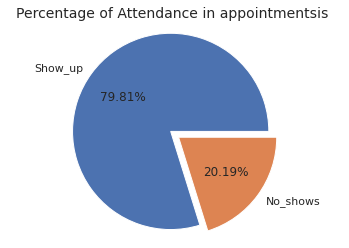

In [48]:
# Pie graph for proportion of appointments completed and no-shows
sns.set(style='darkgrid')
plt.pie(df_status.No_show.value_counts(), \
        labels=['Show_up', 'No_shows'], \
        explode=[0.1, 0], autopct="%.2f%%")
plt.title("Percentage of Attendance in appointmentsis ", fontsize=14);
plt.axis('equal');

This shows that onlt 20.19% of patients showed up for their appointments while 79.81% failed to attend their appointments

In [74]:
# table with the gender and the number of patient that missed or attended their appointment
gender_table = pd.DataFrame(df_status.groupby(['Gender','No_show'])['Patient_Id'].count()).reset_index()
gender_table

,Gender,No_show,Patient_Id
0,F,No,57246
1,F,Yes,14591
2,M,No,30962
3,M,Yes,7723


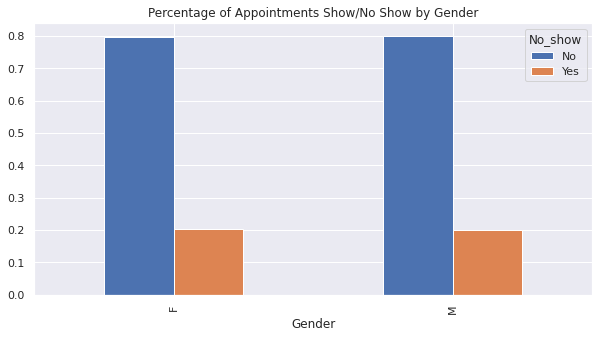

In [75]:
# appointment attendance by gender
gender = df_status.groupby('Gender')['No_show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
gender.set_title("Percentage of Appointments Show/No Show by Gender")
plt.show()


From the table above, we can clearly see that 'Female' patients usually have more appointments that 'Male' patients, they also have about the double number of missed appointment. However, looking at the percentage of missed appointments by gender shows that it is almost the same rate (about 20%). Therefore, gender does not seem to be an important feature.

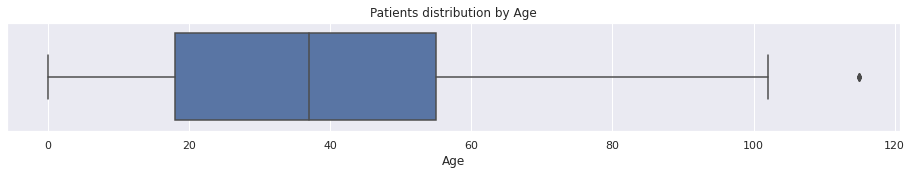

In [ ]:
# Look at the distribution of the Age feature
plt.figure(figsize=(16,2))
plt.xticks(rotation=0)
dist_age = sns.boxplot(x=df.Age)
dist_age.set_title("Patients distribution by Age")
plt.show()

Most the patients are between 18 and 55 years old. The patients who are 115 and -1 years old are outliars

In [ ]:
# create age groups using the distribution plot
bins= [0,10,19,26,36,46,56,66,150]
labels = ['Less than 10','10-18','19-25','26-35','36-45','46-55','56-65','More than 65']
df_status['Age_Group'] = pd.cut(df_status['Age'], bins=bins, labels=labels, right=False)

df_status.groupby(['Age_Group'])['Patient_Id'].count()

Age_Group
Less than 10    17474
10-18           11391
19-25            9731
26-35           14404
36-45           14582
46-55           15437
56-65           14203
More than 65    13300
Name: Patient_Id, dtype: int64

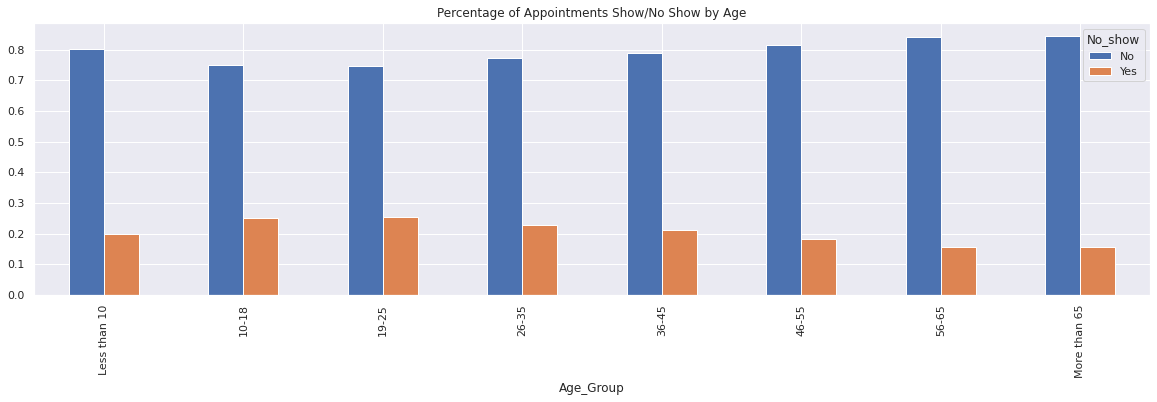

In [ ]:
# appointment attendance by age
age = df_status.groupby('Age_Group')['No_show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(20,5))
age.set_title("Percentage of Appointments Show/No Show by Age")
plt.show()

The patients that seems most likely to not show-up for their appointments are between 10 and 35 years old.

What is the relationship between the independent variables and the dependent variables

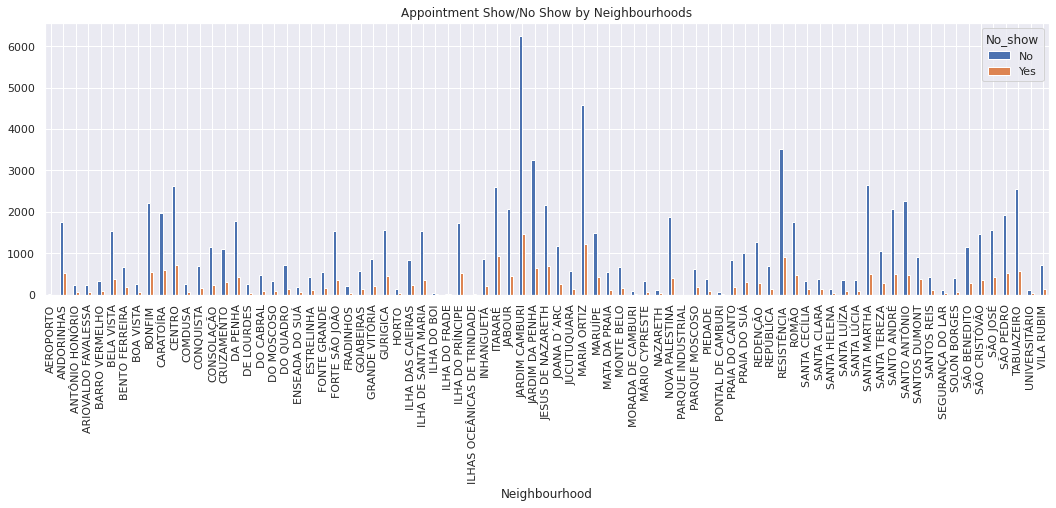

In [79]:
# barchart showing number of show/ no-show by Neighbourhoods
location = df_status.groupby('Neighbourhood')['No_show'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(18,5))
location.set_title("Appointment Show/No Show by Neighbourhoods")
plt.show()


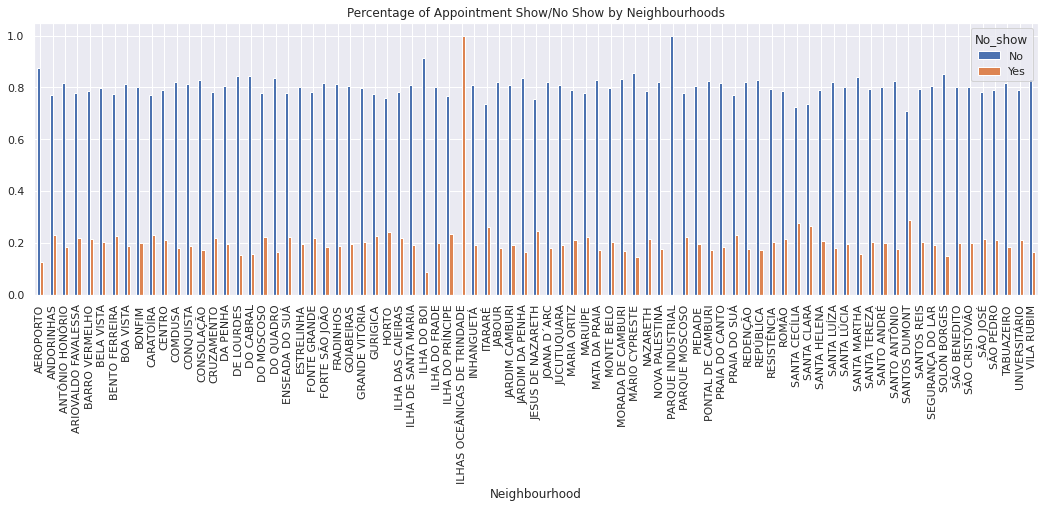

In [80]:
# barchart showing percentage of show/ no-show by Neighbourhoods
location = df_status.groupby('Neighbourhood')['No_show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(18,5))
location.set_title("Percentage of Appointment Show/No Show by Neighbourhoods")
plt.show()

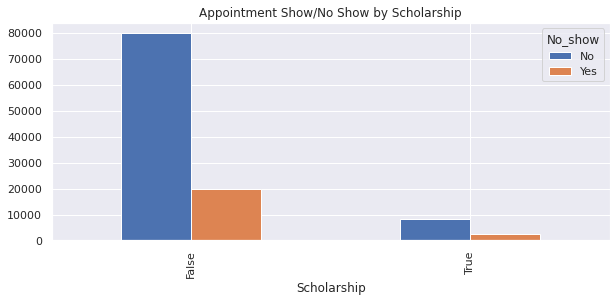

In [81]:
# barchart showing number of show/ no-show by Scholarship
scholarship = df_status.groupby('Scholarship')['No_show'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,4))
scholarship.set_title("Appointment Show/No Show by Scholarship")
plt.show()

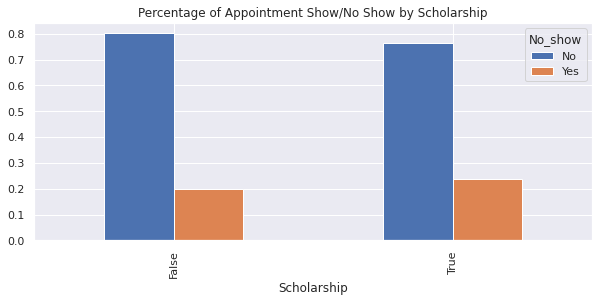

In [83]:
# barchart showing the percentage of show/ no-show by Scholarship
scholarship = df_status.groupby('Scholarship')['No_show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,4))
scholarship.set_title("Percentage of Appointment Show/No Show by Scholarship")
plt.show()

The graphs above shows that 80% of the patients that do not have a scholarship attended their appointent while 75% of the patient with a scholarship attended. 

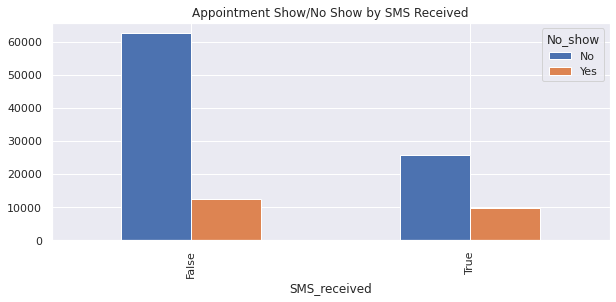

In [95]:
# barchart showing number of show/ no-show by SMS Received
sms = df.groupby('SMS_received')['No_show'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,4))
sms.set_title("Appointment Show/No Show by SMS Received")
plt.show()

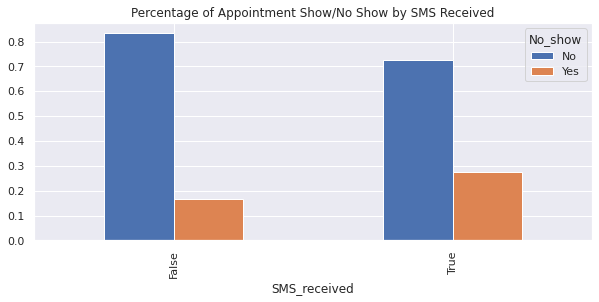

In [97]:
# barchart showing the percentage of show/ no-show by SMS Received
sms = df_status.groupby('SMS_received')['No_show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,4))
sms.set_title("Percentage of Appointment Show/No Show by SMS Received")
plt.show()

The graphs above do not show expected results: 38% appointments for patients that received the sms were missed while 20% of the appointments for patients that did not received a sms. This feature seem to be important in dertermining appointments no show.

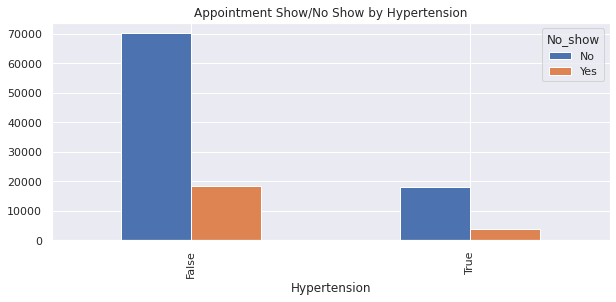

In [84]:
# barchart showing number of show/ no-show by Hypertension
hypertension= df_status.groupby('Hypertension')['No_show'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,4))
hypertension.set_title("Appointment Show/No Show by Hypertension")
plt.show()

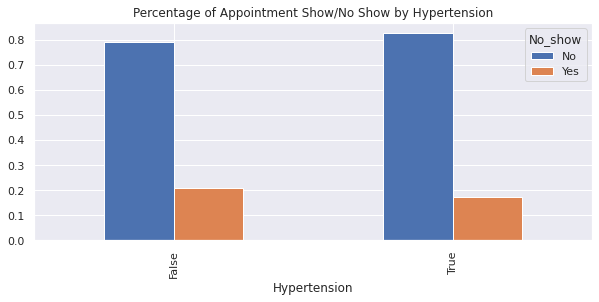

In [85]:
# barchart showing the percentage of show/ no-show by Hypertension
hypertension = df.groupby('Hypertension')['No_show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,4))
hypertension.set_title("Percentage of Appointment Show/No Show by Hypertension")
plt.show()

The patients suffering from hypertension tend to attend their appointment more often than those who do not have this condition. However, appointment with hypertension patients represent a small pool in our dataset, just under 20% of the total appointments. 

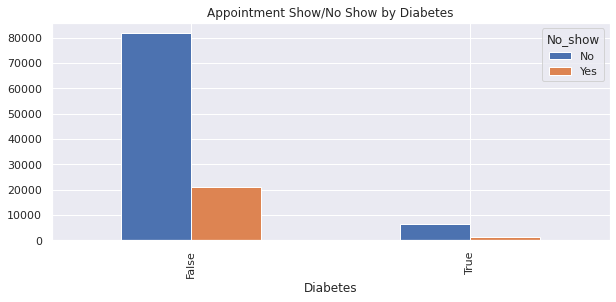

In [87]:
# barchart showing number of show/ no-show by Diabetes
diabetes = df_status.groupby('Diabetes')['No_show'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,4))
diabetes.set_title("Appointment Show/No Show by Diabetes")
plt.show()

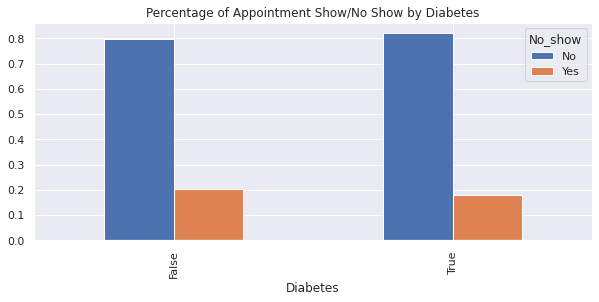

In [88]:
# barchart showing the percentage of show/ no-show by Diabetes
diabetes = df.groupby('Diabetes')['No_show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,4))
diabetes.set_title("Percentage of Appointment Show/No Show by Diabetes")
plt.show()

The patients suffering from Diabetes tend to attend their appointment more often than those who do not have this condition.

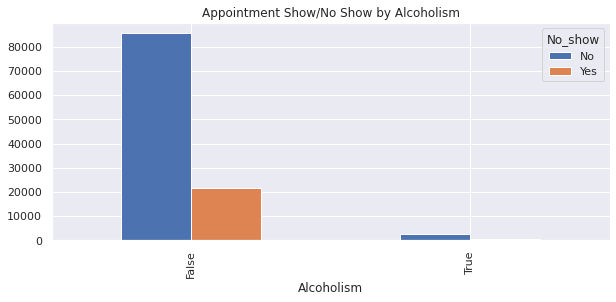

In [101]:
# barchart showing number of show/ no-show by Alcoholism
Alcholics = df_status.groupby('Alcoholism')['No_show'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,4))
Alcholics.set_title("Appointment Show/No Show by Alcoholism")
plt.show()

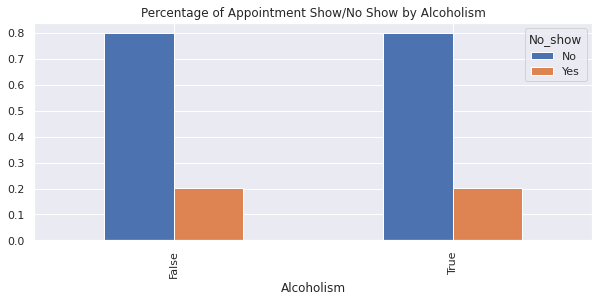

In [91]:
# barchart showing the percentage of show/ no-show by Alcoholism
Alcholics = df.groupby('Alcoholism')['No_show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,4))
Alcholics.set_title("Percentage of Appointment Show/No Show by Alcoholism")
plt.show()

Patients who suffer from alcoholism represent only 3% of all the appointments.
Looking at the graph above, there does not seem to be a difference between the patient suffering from alcoholism and the rest of the dataset

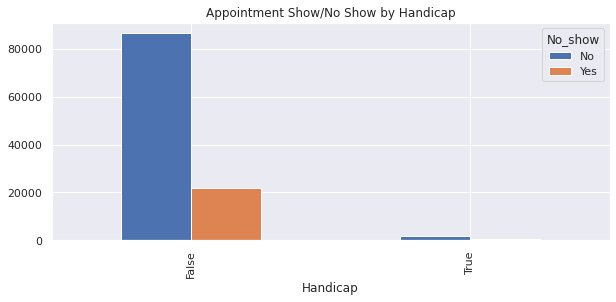

In [92]:
# barchart showing number of show/ no-show by Handicaps
Handicaps = df.groupby('Handicap')['No_show'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,4))
Handicaps.set_title("Appointment Show/No Show by Handicap")
plt.show()

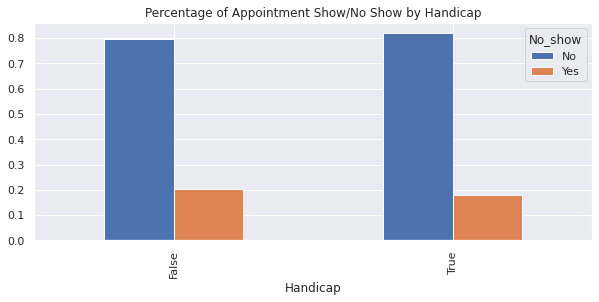

In [94]:
# barchart showing the percentage of show/ no-show by Handicaps
Handicaps = df.groupby('Handicap')['No_show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,4))
Handicaps.set_title("Percentage of Appointment Show/No Show by Handicap")
plt.show()

there doesn't seem to be a difference between the patient suffering from handicap and the rest of the dataset.

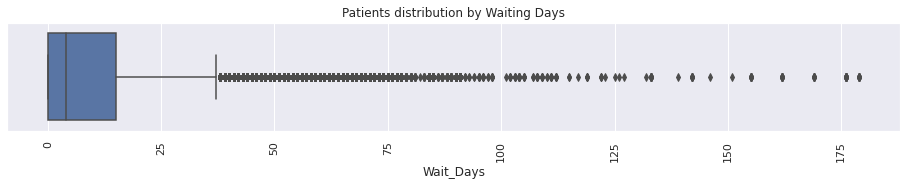

In [ ]:
# Look at the distribution of Waiting_Days
plt.figure(figsize=(16,2))
plt.xticks(rotation=90)
dist_age = sns.boxplot(x=df_status.Wait_Days)
dist_age.set_title("Patients distribution by Waiting Days")
plt.show()


# Summary
1. Females not showing up for appointments are a slight bit higher than those showing up for appointments whereas males showing up for appointments are a slight bit higher than those not showing up for appointments.
2. Contrary to what is expected, patients with scholarship have higher proportions of no show than show up and patients without scholarship have a slightly higher proportion of show up than no show. Scholarship program doesn't seem to be effective in encouraging patients to show up for their medical appointments.
3. Patients with hypertension have higher proportions of show up than no show whereas patients without hypertension have a slightly higher proportion of no shows than show ups. Patients with hypertension are more inclined to show up for their medical appointments.
4. Patients with diabetes have higher proportions of show up than no show whereas patients without diabetes have a slightly higher proportion of no show than show up. Patients with diabetes are more inclined to show up for their medical appointments
5. Patients with handicap have higher proportions of show up than no show whereas patients without handicap have a slightly higher proportion of no show than show up. Patients with handicap are more inclined to show up for their medical appointments.
6. Contrary to what's expected, patients receiving sms message have higher proportions of no show than show up whereas patients not receiving sms message have higher proportion of show up than no show. Hence, sending sms messages is not that big a factor in decreasing the count of no show

# Limitations

The above analysis was my individual view on how to handle this medical data. There could be different approaches to the analysis if the research is focussed on different relationship between the variables. For example, we could be interested in knowing gender specific results for particular age groups,another example is the way in which handicap data has been handled in this analysis. Further investigation with other methods like machine learning methods would provide further insights that might be hidden, like combinations of different variables that affect the no-show rate.